In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.funs import count_outliers
from utils.symmetry_scores import get_scores_full

from transformers import ViTForImageClassification, ViTModel

/opt/homebrew/Caskroom/miniconda/base/envs/attention-geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dir = '../../../../_data/fig-symmetry-vision-models/full-models/ViT-query-key.pkl'

if os.path.isfile(dir):
    with open(dir, 'rb') as file:
        models = pickle.load(file)
else: models = {}

In [7]:
path = ["encoder.layer[", "].attention.attention.query.weight", "].attention.attention.key.weight"]

'ViT base (86M parameters)'
dh = 64
patch = 16
l = 12
d = 768
h = d // dh
model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['ViT-base-16-224-pretrain'] = [l, d, h, dh, sym_scores]

'ViT large (307M parameters)'
dh = 64
patch = 16
l = 24
d = 1024
h = d // dh
model = ViTModel.from_pretrained('google/vit-large-patch16-224-in21k')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['ViT-large-16-224-pretrain'] = [l, d, h, dh, sym_scores]

'ViT large (307M parameters)'
dh = 64
patch = 16
l = 24
d = 1024
h = d // dh
model = ViTModel.from_pretrained('google/vit-large-patch32-224-in21k')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['ViT-large-32-224-pretrain'] = [l, d, h, dh, sym_scores]

'ViT huge (632M parameters)'
dh = 80
patch = 14
l = 32
d = 1280
h = d // dh
model = ViTModel.from_pretrained('google/vit-huge-patch14-224-in21k')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['ViT-huge-14-224-pretrain'] = [l, d, h, dh, sym_scores]

path = ["vit.encoder.layer[", "].attention.attention.query.weight", "].attention.attention.key.weight"]

'ViT base (86M parameters)'
dh = 64
patch = 16
l = 12
d = 768
h = d // dh
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['ViTbase-16-224'] = [l, d, h, dh, sym_scores]

'ViT base (86M parameters)'
dh = 64
patch = 16
l = 12
d = 768
h = d // dh
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-384')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['ViTbase-16-384'] = [l, d, h, dh, sym_scores]

'ViT base (86M parameters)'
dh = 64
patch = 32
l = 12
d = 768
h = d // dh
model = ViTForImageClassification.from_pretrained('google/vit-base-patch32-384')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['ViTbase-32-384'] = [l, d, h, dh, sym_scores]

'ViT large (307M parameters)'
dh = 64
patch = 16
l = 24
d = 1024
h = d // dh
model = ViTForImageClassification.from_pretrained('google/vit-large-patch16-224')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['ViTlarge-16-224'] = [l, d, h, dh, sym_scores]

'ViT large (307M parameters)'
dh = 64
patch = 16
l = 24
d = 1024
h = d // dh
model = ViTForImageClassification.from_pretrained('google/vit-large-patch16-384')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['ViTlarge-16-384'] = [l, d, h, dh, sym_scores]

'ViT large (307M parameters)'
dh = 64
patch = 32
l = 24
d = 1024
h = d // dh
model = ViTForImageClassification.from_pretrained('google/vit-large-patch32-384')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['ViTlarge-32-384'] = [l, d, h, dh, sym_scores]

'save'
with open(dir, 'wb') as file:
    pickle.dump(models, file)

KeyboardInterrupt: 

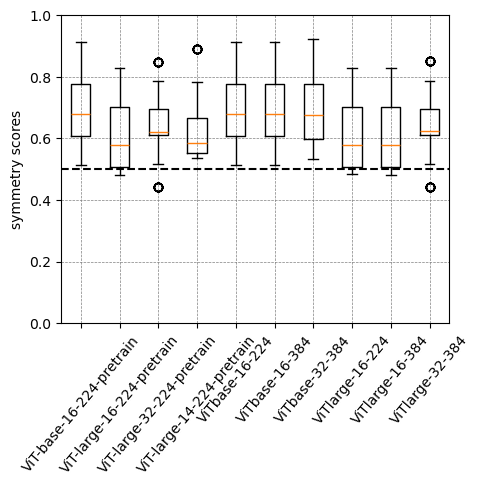

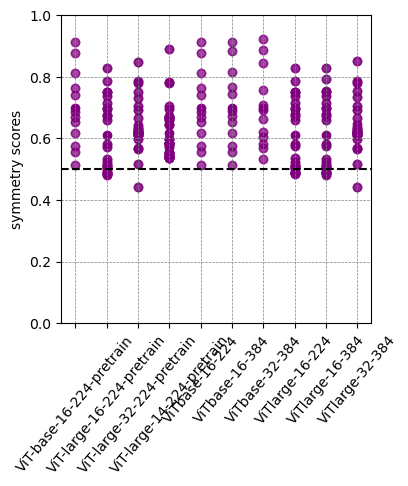

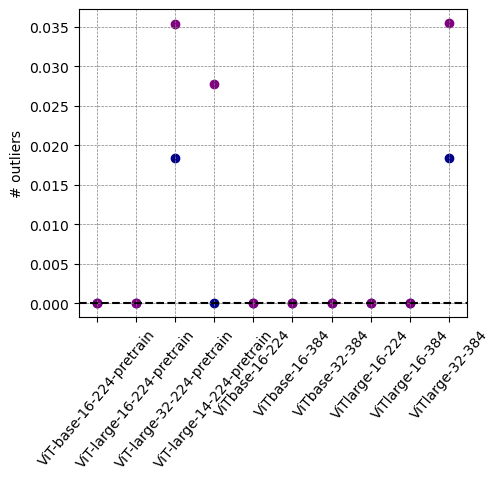

In [6]:
from utils.visualization import symmetry_score_boxplot, symmetry_score_scatter, symmetry_score_outliers

symmetry_score_boxplot(models)
symmetry_score_scatter(models)
symmetry_score_outliers(models)